# Comment importer les données numériques d’un tableur scientifique dans un programme python ?

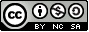
Document sous licence creative commun CC BY-NC-SA BY Gaëlle Rebolini

Le programme présenté ci-dessous est adapté à des fichiers .csv (type tableur) obtenus lors de pointages vidéo. Il devra évidemment être adapté pour des fichiers obtenus lors d'autres expériences.

1.	Enregistrer ou exporter le fichier contenant votre tableau de données sous format .csv dans le dossier contenant votre notebook (fichier .ipynb) ou votre programme python (fichier.py).
    -	Dans Regressi, enregistrer le fichier sous le format (type) OpenOffice, CSV (choisir « Vrai CSV » dans la fenêtre qui s’affiche alors).
    -	Dans Loggerpro, exporter le fichier comme CSV…
    -	Dans Aviméca, exporter les données dans Regressi puis vous reporter à la ligne ci-dessus.
    
Attention: les logiciels de pointage retournent des tableaux de colonnes avec des entêtes (une à deux lignes) qu'il faudra par la suite retranscrire sous forme de listes (une liste par colonne) sans tenir compte des entêtes.

Voici une capture d'écran du fichier parabole.csv obtenu à l'aide de Regavi/Regressi ouvert sous Excel
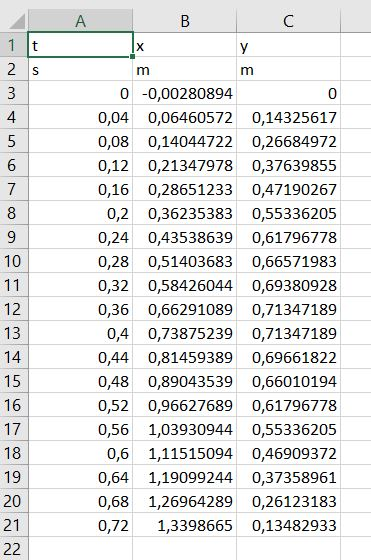

Le même fichier ouvert sous Jupiter Notebook
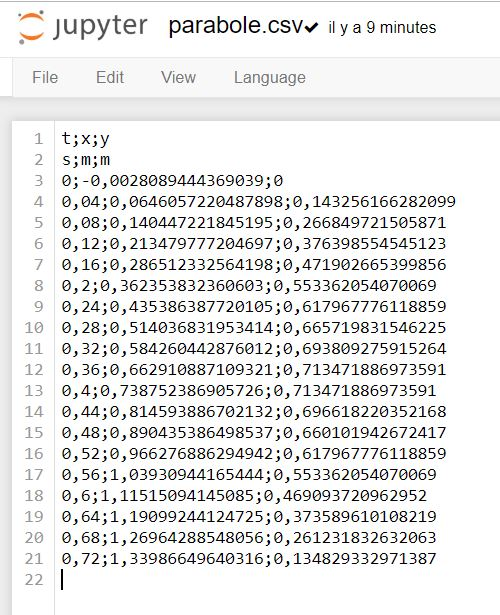

2. Les cellules suivantes contiennent les lignes de code qui vous permettront d'afficher votre tableau de données sous forme de listes (une liste par colonne de votre tableau)

In [1]:
# Chargement de la bibliothèque csv afin de pouvoir lire par la suite le fichier csv

import csv

In [ ]:
# création de la fonction appelée charge_fichier_csv() qui permettra de récupérer les données des colonnes d'un fichier.csv  

def charge_fichier_csv(fichier):

# ouverture du fichier .csv
# Le début du chemin n'a pas besoin d'être spécifié si le fichier .csv se trouve dans le même dossier que ce fichier 
# notebook
# Il est aussi possible d'utiliser la ligne de commande: f = open(fichier,'r',encoding = 'utf-8')

    with open(fichier, 'r', encoding='utf-8') as f :
        
# lecture du fichier à l'aide de la fonction csv.reader. 
# Il faut préciser le délimiteur de colonnes utilisé dans le fichier .csv (ici c'est le ;)

        rfichier = csv.reader(f, delimiter=";")
    
# création et initiation du tableau sous forme de liste qui recevra les listes de nombres réels correspondant aux colonnes
    
        tableau=[]
    
# le contenu d'une cellule est initialement lu comme une chaîne de caractères 
# nous voulons obtenir des listes de nombres réels correspondant aux colonnes de notre tableau, 
# donc :
#        - il ne faut pas prendre en compte les lignes correspondant aux entêtes
#        - il faut convertir les chaines de caractères en nombres réels décimaux
# attention : les virgules des nombres décimaux doivent être remplacées par des points

        for row in rfichier:    # pour chaque ligne du fichier
        
            if row[0][0] not in ("0","1","2","3","4","5","6","7","8","9",",","."):  # test permettant de déterminer si 
                                                # le contenu de la première cellule de la ligne n'est pas un nombre 
                                                # en testant le premier caractère de ce contenu. 
                continue                        # Si le test est validé, grâce à la commande "continue", on revient au 
                                                # début de la boucle for sans continuer d'exécuter son contenu 
                                                # car on suppose que la ligne est une ligne d'entête
                                                # et on change de ligne!
        
            for i in range (len(row)):          # on parcourt chaque cellule d'une ligne correspondant à une colonne
                X = []                  # création d'une liste vide qui contiendra les valeurs des cellules d'une colonne  
                tableau.append(X)                                    # ajout de cette liste au tableau
                tableau[i].append(float(row[i].replace(",",'.')))    # ajout dans cette liste du contenu de la cellule i de
                                                                     # la ligne en la convertissant en nombre réel décimal
            break                     # une fois qu'une seule ligne a été entièrement parcourue, on interrompt la boucle 
                                      # "for row in rfichier" grâce à la commande "break" afin de ne pas créer de liste vide 
                                      # supplémentaire à chaque nouvelle ligne

        for row in rfichier:            # reprend le parcours des lignes du tableau (sauf celles parcourues précédemment)
            for i in range (len(row)):
                tableau[i].append(float(row[i].replace(",",'.')))  
            
        return (tableau)

Voici la fonction sans commentaire afin d'y voir un peu plus clair !

In [3]:
def charge_fichier_csv(fichier):
    with open(fichier, 'r', encoding='utf-8') as f :
        rfichier = csv.reader(f, delimiter=";")
        tableau=[]
        for row in rfichier:
            if row[0][0] not in ("0","1","2","3","4","5","6","7","8","9",",","."):  
                continue                           
            for i in range (len(row)):                               
                X = []                                              
                tableau.append(X)                                    
                tableau[i].append(float(row[i].replace(",",'.')))                                                           
            break                         
        for row in rfichier:              
            for i in range (len(row)):
                tableau[i].append(float(row[i].replace(",",'.')))     
        return (tableau)

In [4]:
tableau = charge_fichier_csv('parabole.csv')
t=tableau[0]
print(t)
x=tableau[1]
print(x)
y=tableau[2]
print(y)



[0.0, 0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28, 0.32, 0.36, 0.4, 0.44, 0.48, 0.52, 0.56, 0.6, 0.64, 0.68, 0.72]
[-0.002808944, 0.064605722, 0.140447222, 0.213479777, 0.286512333, 0.362353832, 0.435386388, 0.514036832, 0.584260443, 0.662910887, 0.738752387, 0.814593887, 0.890435386, 0.966276886, 1.039309442, 1.115150941, 1.190992441, 1.269642885, 1.339866496]
[0.0, 0.143256166, 0.266849722, 0.376398555, 0.471902665, 0.553362054, 0.617967776, 0.665719832, 0.693809276, 0.713471887, 0.713471887, 0.69661822, 0.660101943, 0.617967776, 0.553362054, 0.469093721, 0.37358961, 0.261231833, 0.134829333]
